In [159]:
# https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
human_labelled_data = pd.read_csv('human_labelled_data.csv')
# Alergy, compensation, cutlery, change, collect, combined collumns not correct
human_labelled_data.head(3)

,Unnamed: 0,id,dcity,notes,orderdate,food,Alergy,Compensation,Cutlery,delivery,Change,Collect,other,combined
0,0,363281631,pinner,zahamt bekeshin berenj mashti vasamoon bekeshi...,21/01/2017 14:39,0,NaN,NaN,NaN,0,NaN,NaN,0,3
1,1,363302780,swansea,your food is really good keep it up,21/01/2017 16:36,0,NaN,NaN,NaN,0,NaN,NaN,0,3
2,2,363314044,NaN,your favourite vegans haha. tofu in the vermic...,21/01/2017 16:57,1,1.0,NaN,NaN,0,NaN,NaN,1,1


In [161]:
human_labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Unnamed: 0      10000 non-null int64
id              10000 non-null int64
dcity           9666 non-null object
notes           9992 non-null object
orderdate       10000 non-null object
food            10000 non-null int64
Alergy          4 non-null float64
Compensation    7 non-null float64
Cutlery         2 non-null float64
delivery        10000 non-null int64
Change          1 non-null float64
Collect         5 non-null float64
other           10000 non-null int64
combined        10000 non-null int64
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [162]:
print(human_labelled_data.columns)

Index(['Unnamed: 0', 'id', 'dcity', 'notes', 'orderdate', 'food', 'Alergy',
       'Compensation', 'Cutlery', 'delivery', 'Change', 'Collect', 'other',
       'combined'],
      dtype='object')


In [163]:
human_labelled_data['notes'] = human_labelled_data['notes'].str.lower().astype(str)
human_labelled_data['dcity'] = human_labelled_data['dcity'].str.lower().astype(str)
human_labelled_data.drop(labels=['Unnamed: 0', 'id', 'dcity', 'orderdate', 'Alergy', 'Compensation', 'Cutlery', 'Change', 'Collect', 'combined'], axis=1, inplace=True)
human_labelled_data.head(5)

,notes,food,delivery,other
0,zahamt bekeshin berenj mashti vasamoon bekeshi...,0,0,0
1,your food is really good keep it up,0,0,0
2,your favourite vegans haha. tofu in the vermic...,1,0,1
3,you told me to remind you that you would give ...,1,0,1
4,you need to send me something extra 'cause las...,1,0,0


In [164]:
human_labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
notes       10000 non-null object
food        10000 non-null int64
delivery    10000 non-null int64
other       10000 non-null int64
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [165]:
# The first 3000 entries have been human labelled and should be used for train/test.
# The remainder are not correctly labelled and can have predictions made against them 
# to see if the proportions in each category match the train/test data
train_test_data = human_labelled_data[:3000]
predict_data = human_labelled_data[3001:]

In [166]:
# This dataset has been labelled by matching keywords. Predictions can be made on it from the NN model
# and compared to this to see how good the keyword matching was
machine_labelled_data = pd.read_csv('Machine Labelling of Data/machine_labelled_data.csv')
# Combined column not correct
machine_labelled_data = machine_labelled_data[3001:]
machine_labelled_data.head(5)

,Unnamed: 0,id,dcity,notes,orderdate,food,delivery,other,combined
3001,3001,363296959,swansea,please be quick :),21/01/2017 16:21,0,0,1,3
3002,3002,363311888,chester,please be patient as customer is disabled and ...,21/01/2017 16:54,0,1,0,0
3003,3003,363277029,london,please be as quick as possible,21/01/2017 13:46,0,0,1,3
3004,3004,363296960,peacehaven,please bang on the door loudly,21/01/2017 16:21,0,1,0,0
3005,3005,363312113,willenhall,please bag the starters separately as one of t...,21/01/2017 16:54,1,0,1,1


In [167]:
print(machine_labelled_data.columns)

Index(['Unnamed: 0', 'id', 'dcity', 'notes', 'orderdate', 'food', 'delivery',
       'other', 'combined'],
      dtype='object')


In [168]:
machine_labelled_data['notes'] = machine_labelled_data['notes'].str.lower().astype(str)
machine_labelled_data['dcity'] = machine_labelled_data['dcity'].str.lower().astype(str)
machine_labelled_data.drop(labels=['Unnamed: 0', 'id', 'dcity', 'orderdate', 'combined'], axis=1, inplace=True)
machine_labelled_data.head(5)

,notes,food,delivery,other
3001,please be quick :),0,0,1
3002,please be patient as customer is disabled and ...,0,1,0
3003,please be as quick as possible,0,0,1
3004,please bang on the door loudly,0,1,0
3005,please bag the starters separately as one of t...,1,0,1


In [169]:
machine_labelled_data.drop(labels='notes', axis=1, inplace=True)

In [170]:
machine_labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 3001 to 9999
Data columns (total 3 columns):
food        6999 non-null int64
delivery    6999 non-null int64
other       6999 non-null int64
dtypes: int64(3)
memory usage: 164.1 KB


In [171]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
def stemming(sentence):
    """
    Plumbing for the stemming process that is implemented in the stop_process below
    """
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [172]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# Do further text cleaning and processing into important tokens without punctuation and add this to a new column
def stop_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Stems
    4. Returns a list of the cleaned text
    5. Makes that list back into bread text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostop = ' '.join(nostop)
    
    # Stem the words
    stemed = stemming(nostop)
    
    return stemed

[nltk_data] Downloading package stopwords to /Users/Neil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
# Apply the stemming pipeline to the training data and make a new column of stemmed
# data called tokens to feed into the ML process
tokens = train_test_data['notes'].apply(stop_process)
train_test_data['tokens'] = tokens
train_test_data.drop(labels='notes', axis=1, inplace=True)
train_test_data.head(15)

/Users/Neil/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Neil/Applications/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,food,delivery,other,tokens
0,0,0,0,zahamt bekeshin berenj mashti vasamoon bekeshi...
1,0,0,0,food realli good keep
2,1,0,1,favourit vegan haha tofu vermicelli meat egg m...
3,1,0,1,told remind would give free food due complaint...
4,1,0,0,need send someth extra caus last time mistak o...
5,0,1,0,wait behind argo
6,0,1,1,leav food pub employe cant phone number thank
7,1,0,1,leav biryani sauc thank
8,1,0,0,ask remind peanut butter cake forgot one order
9,1,0,0,yogurt sauc


In [174]:
# And do the same for the predictions data
tokens = predict_data['notes'].apply(stop_process)
predict_data['tokens'] = tokens
predict_data.drop(labels='notes', axis=1, inplace=True)

/Users/Neil/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
# Make a train test split using tokens and combined label as the data to feed in
from sklearn.model_selection import train_test_split

In [176]:
txt_train, txt_test, label_train, label_test = train_test_split(train_test_data['tokens'], train_test_data.drop(labels='tokens', axis=1), test_size=0.3)

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import BinaryRelevance

In [178]:
# Pipleline for multi-label at a time
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', BinaryRelevance(MultinomialNB())),  # train on TF-IDF vectors w/ Naive Bayes classifier but use BinaryRelevance to sort the multi-label stuff
])

# Apply the multi-pipeline
pipeline.fit(txt_train,label_train)
predictions = pipeline.predict(txt_test)

# Check the performance against the test data for multi-label
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(predictions,label_test))
# print(confusion_matrix(predictions,label_test))

from sklearn.metrics import accuracy_score, hamming_loss
print('Accuracy Score: {}'.format(accuracy_score(predictions.todense(),label_test)))
print('1 - Hamming Loss: {}'.format(1-hamming_loss(predictions.todense(),label_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       489
           1       0.94      0.99      0.97       368
           2       0.04      1.00      0.07         4

   micro avg       0.86      0.96      0.91       861
   macro avg       0.65      0.98      0.66       861
weighted avg       0.96      0.96      0.96       861
 samples avg       0.88      0.92      0.89       861

Accuracy Score: 0.85
1 - Hamming Loss: 0.937037037037037


/Users/Neil/Applications/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/Users/Neil/Applications/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [179]:
print(np.shape(predictions.todense()))
tot = np.shape(predictions.todense())[0]

(900, 3)


In [180]:
# Unpack the sparse matrix and put a 1 for each collumn that is true
results_col = np.array(predictions.todense())
print(results_col[0:10,:])

[[0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [0 1 0]]


In [181]:
# Numbers in each category
num_all_cats = 0
num_food_delivery = 0
num_food = 0
num_delivery = 0
num_other = 0 # inc. other plus any other category except all three
for i in results_col:
    if np.sum(i) == 3:
        num_all_cats += 1
    if np.sum(i[0:2]) == 2:
        num_food_delivery += 1
    if i[0] == 1 and i[1] == 0:
        num_food += 1
    if i[0] == 0 and i[1] == 1:
        num_delivery += 1
    if i[2] == 1 and np.sum(i[0:2]) != 2:
        num_other += 1
        
print(num_food, num_delivery, num_other, num_food_delivery, num_all_cats)

486 365 4 3 0


In [182]:
# Comparison with the human labelled data
comp_results = train_test_data.drop(labels='tokens', axis=1)
comp_results = comp_results.values
comp_tot = np.shape(comp_results)[0]
comp_num_all_cats = 0
comp_num_food_delivery = 0
comp_num_food = 0
comp_num_delivery = 0
comp_num_other = 0 # inc. other plus any other category except all three
for i in comp_results:
    if np.sum(i) == 3:
        comp_num_all_cats += 1
    if np.sum(i[0:2]) == 2:
        comp_num_food_delivery += 1
    if i[0] == 1 and i[1] == 0:
        comp_num_food += 1
    if i[0] == 0 and i[1] == 1:
        comp_num_delivery += 1
    if i[2] == 1 and np.sum(i[0:2]) != 2:
        comp_num_other += 1
        
print(comp_num_food, comp_num_delivery, comp_num_other, comp_num_food_delivery, comp_num_all_cats)

1490 1191 304 103 5


In [183]:
# Percent that are only other
prop_other = num_other/tot
print(prop_other)
comp_prop_other = comp_num_other/comp_tot
print(comp_prop_other)

0.0044444444444444444
0.10133333333333333


In [184]:
# Percent that are only food
prop_food = num_food/tot
print(prop_food)
comp_prop_food = comp_num_food/comp_tot
print(comp_prop_food)

0.54
0.49666666666666665


In [185]:
# Percent that are only delivery
prop_delivery = num_delivery/tot
print(prop_delivery)
comp_prop_delivery = comp_num_delivery/comp_tot
print(comp_prop_delivery)

0.40555555555555556
0.397


In [186]:
# Percent that are food and delivery
prop_food_delivery = num_food_delivery/tot
print(prop_food_delivery)
comp_prop_food_delivery = comp_num_food_delivery/comp_tot
print(comp_prop_food_delivery)

0.0033333333333333335
0.034333333333333334


In [187]:
# Percent that are all categories
prop_all_cats = num_all_cats/tot
print(prop_all_cats)
comp_prop_all_cats = comp_num_all_cats/comp_tot
print(comp_prop_all_cats)

0.0
0.0016666666666666668


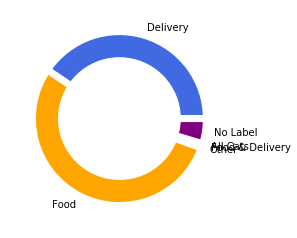

In [188]:
# Create data
names=['Delivery', 'Food', 'Other', 'Food & Delivery', 'All Cats', 'No Label']
size=[prop_delivery, prop_food, prop_other, prop_food_delivery, prop_all_cats, (1-(prop_delivery+prop_food+prop_other+prop_food_delivery+prop_all_cats))]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Other settings
plt.axes(aspect='equal')
plt.pie(size, labels=names, labeldistance=1.1, colors=['royalblue', 'orange', 'darkorchid', 'red', 'seagreen', 'purple'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.rcParams['text.color'] = 'black'
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [189]:
predictions = pipeline.predict(predict_data['tokens'])
results_col = np.array(predictions.todense())
print(results_col[0:10,:])

[[0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [190]:
# Numbers in each category
tot = np.shape(predictions.todense())[0]
num_all_cats = 0
num_food_delivery = 0
num_food = 0
num_delivery = 0
num_other = 0 # inc. other plus any other category except all three
for i in results_col:
    if np.sum(i) == 3:
        num_all_cats += 1
    if np.sum(i[0:2]) == 2:
        num_food_delivery += 1
    if i[0] == 1 and i[1] == 0:
        num_food += 1
    if i[0] == 0 and i[1] == 1:
        num_delivery += 1
    if i[2] == 1 and np.sum(i[0:2]) != 2:
        num_other += 1
        
print(num_food, num_delivery, num_other, num_food_delivery, num_all_cats)

5241 1623 7 45 0


In [191]:
# Percent that are only other
prop_other = num_other/tot
prop_other

0.0010001428775539363

In [192]:
# Percent that are only food
prop_food = num_food/tot
prop_food

0.7488212601800257

In [193]:
# Percent that are only delivery
prop_delivery = num_delivery/tot
prop_delivery

0.23189027003857693

In [194]:
# Percent that are food and delivery
prop_food_delivery = num_food_delivery/tot
prop_food_delivery

0.006429489927132447

In [195]:
# Percent that are all categories
prop_all_cats = num_all_cats/tot
prop_all_cats

0.0

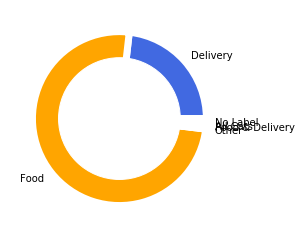

In [196]:
# Create data
names=['Delivery', 'Food', 'Other', 'Food & Delivery', 'All Cats', 'No Label']
size=[prop_delivery, prop_food, prop_other, prop_food_delivery, prop_all_cats, (1-(prop_delivery+prop_food+prop_other+prop_food_delivery+prop_all_cats))]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Other settings
plt.axes(aspect='equal')
plt.pie(size, labels=names, labeldistance=1.1, colors=['royalblue', 'orange', 'darkorchid', 'red', 'seagreen', 'purple'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.rcParams['text.color'] = 'black'
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [197]:
# Check how good the machine lablelled data was

In [198]:
machine_labelled_data.head(5)

,food,delivery,other
3001,0,0,1
3002,0,1,0
3003,0,0,1
3004,0,1,0
3005,1,0,1


In [199]:
results_col_machine = machine_labelled_data.values

In [200]:
print(results_col_machine[0:10])

[[0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [201]:
np.shape(results_col_machine)

(6999, 3)

In [202]:
np.shape(results_col)

(6999, 3)

In [203]:
tot = np.shape(results_col)[0]

In [204]:
bools = results_col_machine == results_col

In [205]:
bools[0:50]

array([[ True,  True, False],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [False,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [Fa

In [206]:
# Percent food correct
food_correct = (np.sum(bools[:,0])/tot)*100
food_correct

92.7703957708244

In [207]:
# Percent delivery correct
delivery_correct = (np.sum(bools[:,1])/tot)*100
delivery_correct

93.98485497928274

In [208]:
# Percent other correct
other_correct = (np.sum(bools[:,2])/tot)*100
other_correct

73.88198314044864